## Classification on red and white wine characteristics

1.First, import the red and the white wine csv files into separate pandas dataframes from the following website:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')
Add a new column to each data frame called "winetype". For the white wine dataset label the values in this column with a 0, indicating white wine. For the red wine dataset, label values with a 1, indicating red wine. Combine both datasets into a single dataframe.
The target data (i.e. the dependent variable) is "winetype".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
white['winetype'] = 0
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
red['winetype'] = 1
wine = pd.concat([white, red])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


## 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.

In [3]:
"""
volatile acidity
citric acid
residual sugar
"""
new_wine = wine[['winetype','volatile acidity','citric acid','residual sugar']]

<AxesSubplot:ylabel='Frequency'>

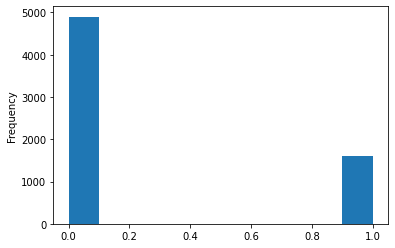

In [4]:
new_wine['winetype'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

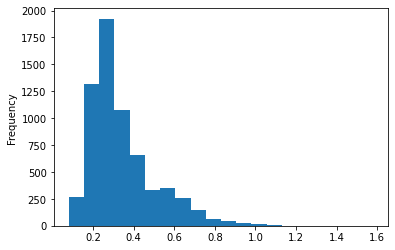

In [5]:
new_wine['volatile acidity'].plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

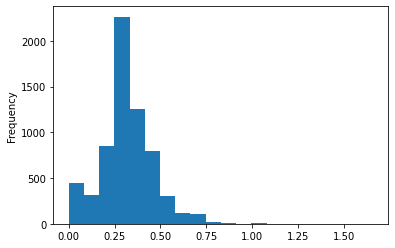

In [6]:
new_wine['citric acid'].plot.hist(bins = 20)

<AxesSubplot:ylabel='Frequency'>

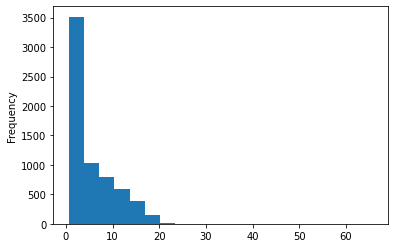

In [7]:
new_wine['residual sugar'].plot.hist(bins = 20)

## 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable.

In [8]:
#Split data in training and test set
from sklearn.model_selection import train_test_split
y2 = wine['winetype']
X2 = wine[['fixed acidity','volatile acidity',
          'citric acid','residual sugar','chlorides','free sulfur dioxide',
          'total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42)

### Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results?

In [9]:
#import needed model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [10]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X2_train, y2_train)
cv_knn = cross_val_score(knn, X2_test, y2_test)
print("KNN original score is: {:.3f}".format(knn.score(X2_test, y2_test)))
print("KNN cross validation average score is: {:.3f}".format(np.mean(cv_knn)))

print('\n')

#Logistic Regression
logreg = LogisticRegression(penalty = 'none')
logreg.fit(X2_train, y2_train)
cv_logreg = cross_val_score(logreg, X2_test, y2_test)
print("Logistic regression original score is: {:.3f}".format(logreg.score(X2_test, y2_test)))
print("Logistic regression cross validation average score is: {:.3f}".format(np.mean(cv_logreg)))

print('\n')

#Penalized Logistic Regression
p_logreg = LogisticRegression(penalty = 'l2')
p_logreg.fit(X2_train, y2_train)
cv_p_logreg = cross_val_score(p_logreg, X2_test, y2_test)
print("Penalized Logistic original regression score is: {:.3f}".format(p_logreg.score(X2_test, y2_test)))
print("Penalized regression cross validation average score is: {:.3f}".format(np.mean(cv_p_logreg)))

KNN original score is: 0.936
KNN cross validation average score is: 0.924


Logistic regression original score is: 0.977
Logistic regression cross validation average score is: 0.980


Penalized Logistic original regression score is: 0.975
Penalized regression cross validation average score is: 0.972


**Conclusion:**  
The scores of three models **do not have obvious changes** after cross validation.

### How does scaling the data with StandardScaler influence the results?

In [11]:
#import some preprocessing modules and standard scale the data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X2_train) 
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [12]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X2_train_scaled, y2_train)
cv_knn = cross_val_score(knn, X2_test_scaled, y2_test)
print("KNN original scaled score is: {:.3f}".format(knn.score(X2_test_scaled, y2_test)))
print("KNN cross validation scaled average score is: {:.3f}".format(np.mean(cv_knn)))

print('\n')

#Logistic Regression
logreg = LogisticRegression(penalty ='none')
logreg.fit(X2_train_scaled, y2_train)
cv_logreg = cross_val_score(logreg, X2_test_scaled, y2_test)
print("Logistic regression original scaled score is: {:.3f}".format(logreg.score(X2_test_scaled, y2_test)))
print("Logistic regression cross validation scaled average score is: {:.3f}".format(np.mean(cv_logreg)))

print('\n')

#Penalized Logistic Regression
p_logreg = LogisticRegression(penalty = 'l2')
p_logreg.fit(X2_train_scaled, y2_train)
cv_p_logreg = cross_val_score(p_logreg, X2_test_scaled, y2_test)
print("Penalized Logistic original scaled regression score is: {:.3f}".format(p_logreg.score(X2_test_scaled, y2_test)))
print("Penalized regression cross validation scaled average score is: {:.3f}".format(np.mean(cv_p_logreg)))

KNN original scaled score is: 0.991
KNN cross validation scaled average score is: 0.993


Logistic regression original scaled score is: 0.993
Logistic regression cross validation scaled average score is: 0.993


Penalized Logistic original scaled regression score is: 0.991
Penalized regression cross validation scaled average score is: 0.991


**Conclusion:**  
The scores of KNN for both original score and cross validation score **improve** after StandardScaler, the scores of Logistic Regression or Penalized Logistic Regression **improve slightly** after StandardScaler.

## 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [13]:
#KNN
param_grid_knn = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(knn, param_grid_knn)
cv_knn_grid = cross_val_score(grid_knn, X2_test_scaled, y2_test)
print("KNN GridSearchCV scaled cross validation average score is: {:.3f}".format(np.mean(cv_knn_grid)))

#Penalized Logistic Regression
param_grid_plogreg = {'C': np.arange(1, 10, 1)}
grid_plogreg = GridSearchCV(p_logreg, param_grid_plogreg)
cv_plogreg_grid = cross_val_score(grid_plogreg, X2_test_scaled, y2_test)
print("Penalized logistic Regression GridSearchCV scaled cross validation average score is: {:.3f}".format(np.mean(cv_plogreg_grid)))

KNN GridSearchCV scaled cross validation average score is: 0.991
Penalized logistic Regression GridSearchCV scaled cross validation average score is: 0.993


**Conclusion:**  
The cross-validation scores of KNN and Penalized Logistic Regression **do not improve** after using GridSearchCV.

## 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling.

###  Do the parameters for models that can be tuned change?

In [14]:
#import relevant modules
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

In [15]:
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

#KNN
param_grid_knn = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv = skfold)
cv_knn_grid = cross_val_score(grid_knn, X2_test_scaled, y2_test)
print("KNN GridSearchCV(skfold) cross validation average score is: {:.3f}".format(np.mean(cv_knn_grid)))

#Penalized Logistic Regression
param_grid_plogreg = {'C': np.arange(1, 10, 1)}
grid_plogreg = GridSearchCV(p_logreg, param_grid_plogreg, cv = skfold)
cv_plogreg_grid = cross_val_score(grid_plogreg, X2_test_scaled, y2_test)
print("Penalized logistic Regression(skfold) GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_plogreg_grid)))

KNN GridSearchCV(skfold) cross validation average score is: 0.992
Penalized logistic Regression(skfold) GridSearchCV cross validation average score is: 0.993


In [16]:
#KNN
param_grid_knn = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv = kfold)
cv_knn_grid = cross_val_score(grid_knn, X2_test_scaled, y2_test)
print("KNN GridSearchCV(kfold) cross validation average score is: {:.3f}".format(np.mean(cv_knn_grid)))

#Penalized Logistic Regression
param_grid_plogreg = {'C': np.arange(1, 10, 1)}
grid_plogreg = GridSearchCV(p_logreg, param_grid_plogreg, cv = kfold)
cv_plogreg_grid = cross_val_score(grid_plogreg, X2_test_scaled, y2_test)
print("Penalized logistic Regression(kfold) GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_plogreg_grid)))

KNN GridSearchCV(kfold) cross validation average score is: 0.992
Penalized logistic Regression(kfold) GridSearchCV cross validation average score is: 0.992


**Conclusion:**  
The parameters for models that **can be tuned change.**

### **Do they change if you change the random seed of the shuffling?**

*change the random seed of the shuffling*

In [17]:
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 21)
kfold = KFold(n_splits = 10, shuffle = True, random_state = 21)

#KNN
param_grid_knn = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv = skfold)
cv_knn_grid = cross_val_score(grid_knn, X2_test_scaled, y2_test)
print("KNN GridSearchCV(skfold) cross validation average score is: {:.3f}".format(np.mean(cv_knn_grid)))

#Penalized Logistic Regression
param_grid_plogreg = {'C': np.arange(1, 10, 1)}
grid_plogreg = GridSearchCV(p_logreg, param_grid_plogreg, cv = skfold)
cv_plogreg_grid = cross_val_score(grid_plogreg, X2_test_scaled, y2_test)
print("Penalized logistic Regression(skfold) GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_plogreg_grid)))

KNN GridSearchCV(skfold) cross validation average score is: 0.991
Penalized logistic Regression(skfold) GridSearchCV cross validation average score is: 0.992


In [18]:
#KNN
param_grid_knn = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(knn, param_grid_knn, cv = kfold)
cv_knn_grid = cross_val_score(grid_knn, X2_test_scaled, y2_test)
print("KNN GridSearchCV(kfold) cross validation average score is: {:.3f}".format(np.mean(cv_knn_grid)))

#Penalized Logistic Regression
param_grid_plogreg = {'C': np.arange(1, 10, 1)}
grid_plogreg = GridSearchCV(p_logreg, param_grid_plogreg, cv = kfold)
cv_plogreg_grid = cross_val_score(grid_plogreg, X2_test_scaled, y2_test)
print("Penalized logistic Regression(kfold) GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_plogreg_grid)))

KNN GridSearchCV(kfold) cross validation average score is: 0.991
Penalized logistic Regression(kfold) GridSearchCV cross validation average score is: 0.992


**Conclusion:**   
They **change** if we change the random seed of the shuffling.

### Do they change if you change the random state of the split into training and test data?

*change the random state of the split*

In [19]:
#change the random state
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 21)
scaler = preprocessing.StandardScaler()
scaler.fit(X2_train) 
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [20]:
#KNN
param_grid_knn = {'n_neighbors': np.arange(1, 10, 1)}
grid_knn = GridSearchCV(knn, param_grid_knn)
cv_knn_grid = cross_val_score(grid_knn, X2_test_scaled, y2_test)
print("KNN GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_knn_grid)))

#Penalized Logistic Regression
param_grid_plogreg = {'C': np.arange(1, 10, 1)}
grid_plogreg = GridSearchCV(p_logreg, param_grid_plogreg)
cv_plogreg_grid = cross_val_score(grid_plogreg, X2_test_scaled, y2_test)
print("Penalized logistic Regression GridSearchCV cross validation average score is: {:.3f}".format(np.mean(cv_plogreg_grid)))

KNN GridSearchCV cross validation average score is: 0.987
Penalized logistic Regression GridSearchCV cross validation average score is: 0.991


**Conclusion:**   
They **change** if we change the random state of the split into training and test data.

## 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [21]:
# reset random state first
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state = 42)
scaler = preprocessing.StandardScaler()
scaler.fit(X2_train) 
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [22]:
#calculate coefficients
independence = X2.columns.tolist()
logreg_coef = logreg.coef_
plogreg_coef = p_logreg.coef_

logreg_coef1 = [i for raw in logreg_coef for i in raw]
plogreg_coef1 = [m for raw1 in plogreg_coef for m in raw1]

coef_dic = {"Independent" : independence,
            "Logreg_coef": logreg_coef1,
            "Plogreg_coef": plogreg_coef1}

coef = pd.DataFrame(coef_dic)
print(coef)

             Independent  Logreg_coef  Plogreg_coef
0          fixed acidity    -0.396933      0.355438
1       volatile acidity     1.155973      1.280869
2            citric acid    -0.464869     -0.359597
3         residual sugar    -5.603123     -3.521214
4              chlorides     0.759642      0.793006
5    free sulfur dioxide     1.435934      0.928958
6   total sulfur dioxide    -3.336956     -2.918439
7                density     5.750060      3.497433
8                     pH    -0.288440      0.320909
9              sulphates     0.437953      0.635613
10               alcohol     2.317036      1.204437
11               quality     0.186765      0.162930


**Conclusion:**  
I would choose **Logistic Regression model** to predict new data:  
1.Logistic Regression has nearly the same score as or slightly higher score than Penalized Regression model.  
2.Logistic Regression could display some obvious independents in the analysis, such as residual sugar, density, etc.  